In [1]:
# importing libraries
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix
import itertools
from ast import literal_eval
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, log_loss, precision_score, recall_score, make_scorer, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
data = pd.read_csv("movie.metadata.tsv",sep="\t",header=None) # loading dataset

In [5]:
data

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [6]:
data.columns = ["Movie_id",1,"Movie_name","Release_year",4,5,"Languagae","Country","Genre"]
data

,Movie_id,1,Movie_name,Release_year,4,5,Languagae,Country,Genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [7]:
plots=[]
with open("plot_summaries.txt","r",encoding="utf8") as f:
    reader = csv. reader (f, dialect='excel-tab')
    for row in tqdm (reader):
        plots.append(row)

42303it [00:01, 28403.55it/s]


In [8]:
movie_id = []
synopsis = []
for i in plots:
    movie_id.append(i[0])
    synopsis.append(i[1])

In [9]:
movies = pd.DataFrame()

In [10]:
movies["Movie_id"] = movie_id
movies["Synopsis"] = synopsis

In [11]:
movies

,Movie_id,Synopsis
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


In [12]:
data["Movie_id"].info()
data["Movie_id"] = data["Movie_id"].astype(str)
data["Movie_id"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 81741 entries, 0 to 81740
Series name: Movie_id
Non-Null Count  Dtype
--------------  -----
81741 non-null  int64
dtypes: int64(1)
memory usage: 638.7 KB
<class 'pandas.core.series.Series'>
RangeIndex: 81741 entries, 0 to 81740
Series name: Movie_id
Non-Null Count  Dtype 
--------------  ----- 
81741 non-null  object
dtypes: object(1)
memory usage: 638.7+ KB


In [13]:
movies = pd.merge(movies,data[["Movie_id","Movie_name","Genre"]],on="Movie_id")

In [14]:
movies

,Movie_id,Synopsis,Movie_name,Genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}"
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi..."
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music..."
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}"


In [15]:
genres = []
for i in movies ['Genre']:
    genres.append(list (json. loads (i).values()))
movies ['Genre_new'] = genres

In [16]:
data = movies [~(movies ['Genre_new'].str.len() == 0)]
data.shape, movies.shape

((41793, 5), (42204, 5))

In [17]:
data

,Movie_id,Synopsis,Movie_name,Genre,Genre_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema..."
...,...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",[Children's]
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...","[Silent film, Indie, Black-and-white, Period p..."
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...","[Short Film, Music, Biographical film, Documen..."
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama]


In [18]:
genresList = sum(genres,[])
genresList

['Drama',
 'World cinema',
 'Action/Adventure',
 'Science Fiction',
 'Action',
 'Drama',
 'Musical',
 'Action',
 'Drama',
 'Bollywood',
 'Screwball comedy',
 'Comedy',
 'Crime Fiction',
 'Drama',
 'Docudrama',
 'World cinema',
 'Courtroom Drama',
 'Thriller',
 'Action/Adventure',
 'Action',
 'Drama',
 'Thriller',
 'Drama',
 'Horror',
 'Drama',
 'Teen',
 'Romantic comedy',
 'Media Satire',
 'Americana',
 'Comedy-drama',
 'Black-and-white',
 'Drama',
 'Comedy',
 'Romance Film',
 'Short Film',
 'Family Film',
 'Animation',
 'Comedy',
 'Crime Fiction',
 'Drama',
 'Comedy',
 'World cinema',
 'Parody',
 'Comedy',
 'War film',
 'Epic',
 'Action/Adventure',
 'Period piece',
 'Drama',
 'Film adaptation',
 'Action',
 'Political drama',
 'Cult',
 'Coming of age',
 'Comedy',
 'Teen',
 'Horror',
 'Thriller',
 'Mystery',
 'Comedy film',
 'Crime Fiction',
 'Horror',
 'Drama',
 'Thriller',
 'Crime Fiction',
 'Indie',
 'Martial Arts Film',
 'Romance Film',
 'Action',
 'Period piece',
 'Drama',
 'Indie'

In [19]:
len(set(genresList))

363

In [20]:
genresFreq = nltk. FreqDist(genresList)

In [21]:
genresFreq

FreqDist({'Drama': 19134, 'Comedy': 10467, 'Romance Film': 6666, 'Thriller': 6530, 'Action': 5868, 'World cinema': 5153, 'Crime Fiction': 4275, 'Horror': 4082, 'Black-and-white': 3731, 'Indie': 3668, ...})

In [22]:
genres_list = pd.DataFrame({"Genre": list (genresFreq.keys ()), "Count": list (genresFreq.values())})
genres_list

,Genre,Count
0,Drama,19134
1,World cinema,5153
2,Action/Adventure,3553
3,Science Fiction,2339
4,Action,5868
...,...,...
358,Statutory rape,1
359,Silhouette animation,1
360,Children's Issues,1
361,Homoeroticism,1


In [23]:
genres_list = genres_list [genres_list["Count"]<1000] # Filtering top Genres
genres_list

,Genre,Count
7,Screwball comedy,246
10,Docudrama,252
11,Courtroom Drama,184
14,Teen,824
16,Media Satire,71
...,...,...
358,Statutory rape,1
359,Silhouette animation,1
360,Children's Issues,1
361,Homoeroticism,1


In [24]:
bottomGenres = genres_list["Genre"].tolist()+["Silent film", "Indie", "Comedy-drama", "Comedy film", "Film adaptation", "Black-and-white"]
data["Genre_new"] = data.Genre_new.apply(lambda x: [i for i in x if i not in bottomGenres])

C:\Users\rohan\AppData\Local\Temp\ipykernel_18304\1513800399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Genre_new"] = data.Genre_new.apply(lambda x: [i for i in x if i not in bottomGenres])


In [25]:
data = data[data['Genre_new'].map (lambda x: len(x)) > 0]

In [26]:
data

,Movie_id,Synopsis,Movie_name,Genre,Genre_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...",[Comedy]
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, World cinema]"
...,...,...,...,...,...
42198,2867597,"An attempt to bring the famed ""Mr. Bill"" clay ...",Mr. Bill's Real Life Adventures,"{""/m/01z4y"": ""Comedy"", ""/m/09q17"": ""Slapstick""}",[Comedy]
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...","[Period piece, Drama, War film]"
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...","[Short Film, Documentary]"
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama]


In [27]:
genres = []
for i in data["Genre_new"]:
    genres.append(i)

In [28]:
genreList = sum(genres,[])

In [29]:
len(set(genreList))

27

In [30]:
genreList

['Drama',
 'World cinema',
 'Action/Adventure',
 'Science Fiction',
 'Action',
 'Drama',
 'Musical',
 'Action',
 'Drama',
 'Bollywood',
 'Comedy',
 'Crime Fiction',
 'Drama',
 'World cinema',
 'Thriller',
 'Action/Adventure',
 'Action',
 'Drama',
 'Thriller',
 'Drama',
 'Horror',
 'Drama',
 'Romantic comedy',
 'Drama',
 'Comedy',
 'Romance Film',
 'Short Film',
 'Family Film',
 'Animation',
 'Comedy',
 'Crime Fiction',
 'Drama',
 'Comedy',
 'World cinema',
 'Comedy',
 'War film',
 'Action/Adventure',
 'Period piece',
 'Drama',
 'Action',
 'Comedy',
 'Horror',
 'Thriller',
 'Mystery',
 'Crime Fiction',
 'Horror',
 'Drama',
 'Thriller',
 'Crime Fiction',
 'Romance Film',
 'Action',
 'Period piece',
 'Drama',
 'Drama',
 'War film',
 'Short Film',
 'Family Film',
 'Animation',
 'Drama',
 'Action',
 'Drama',
 'Adventure',
 'Drama',
 'Documentary',
 'Drama',
 'Short Film',
 'Comedy',
 'Romance Film',
 'Musical',
 'Romance Film',
 'Comedy',
 'Bollywood',
 'Romance Film',
 'Action',
 'Drama',


In [31]:
genresFreq = nltk.FreqDist(genresList)
genres_list = pd.DataFrame({ "Genre": list(genresFreq.keys ()), "Count": list(genresFreq.values())})

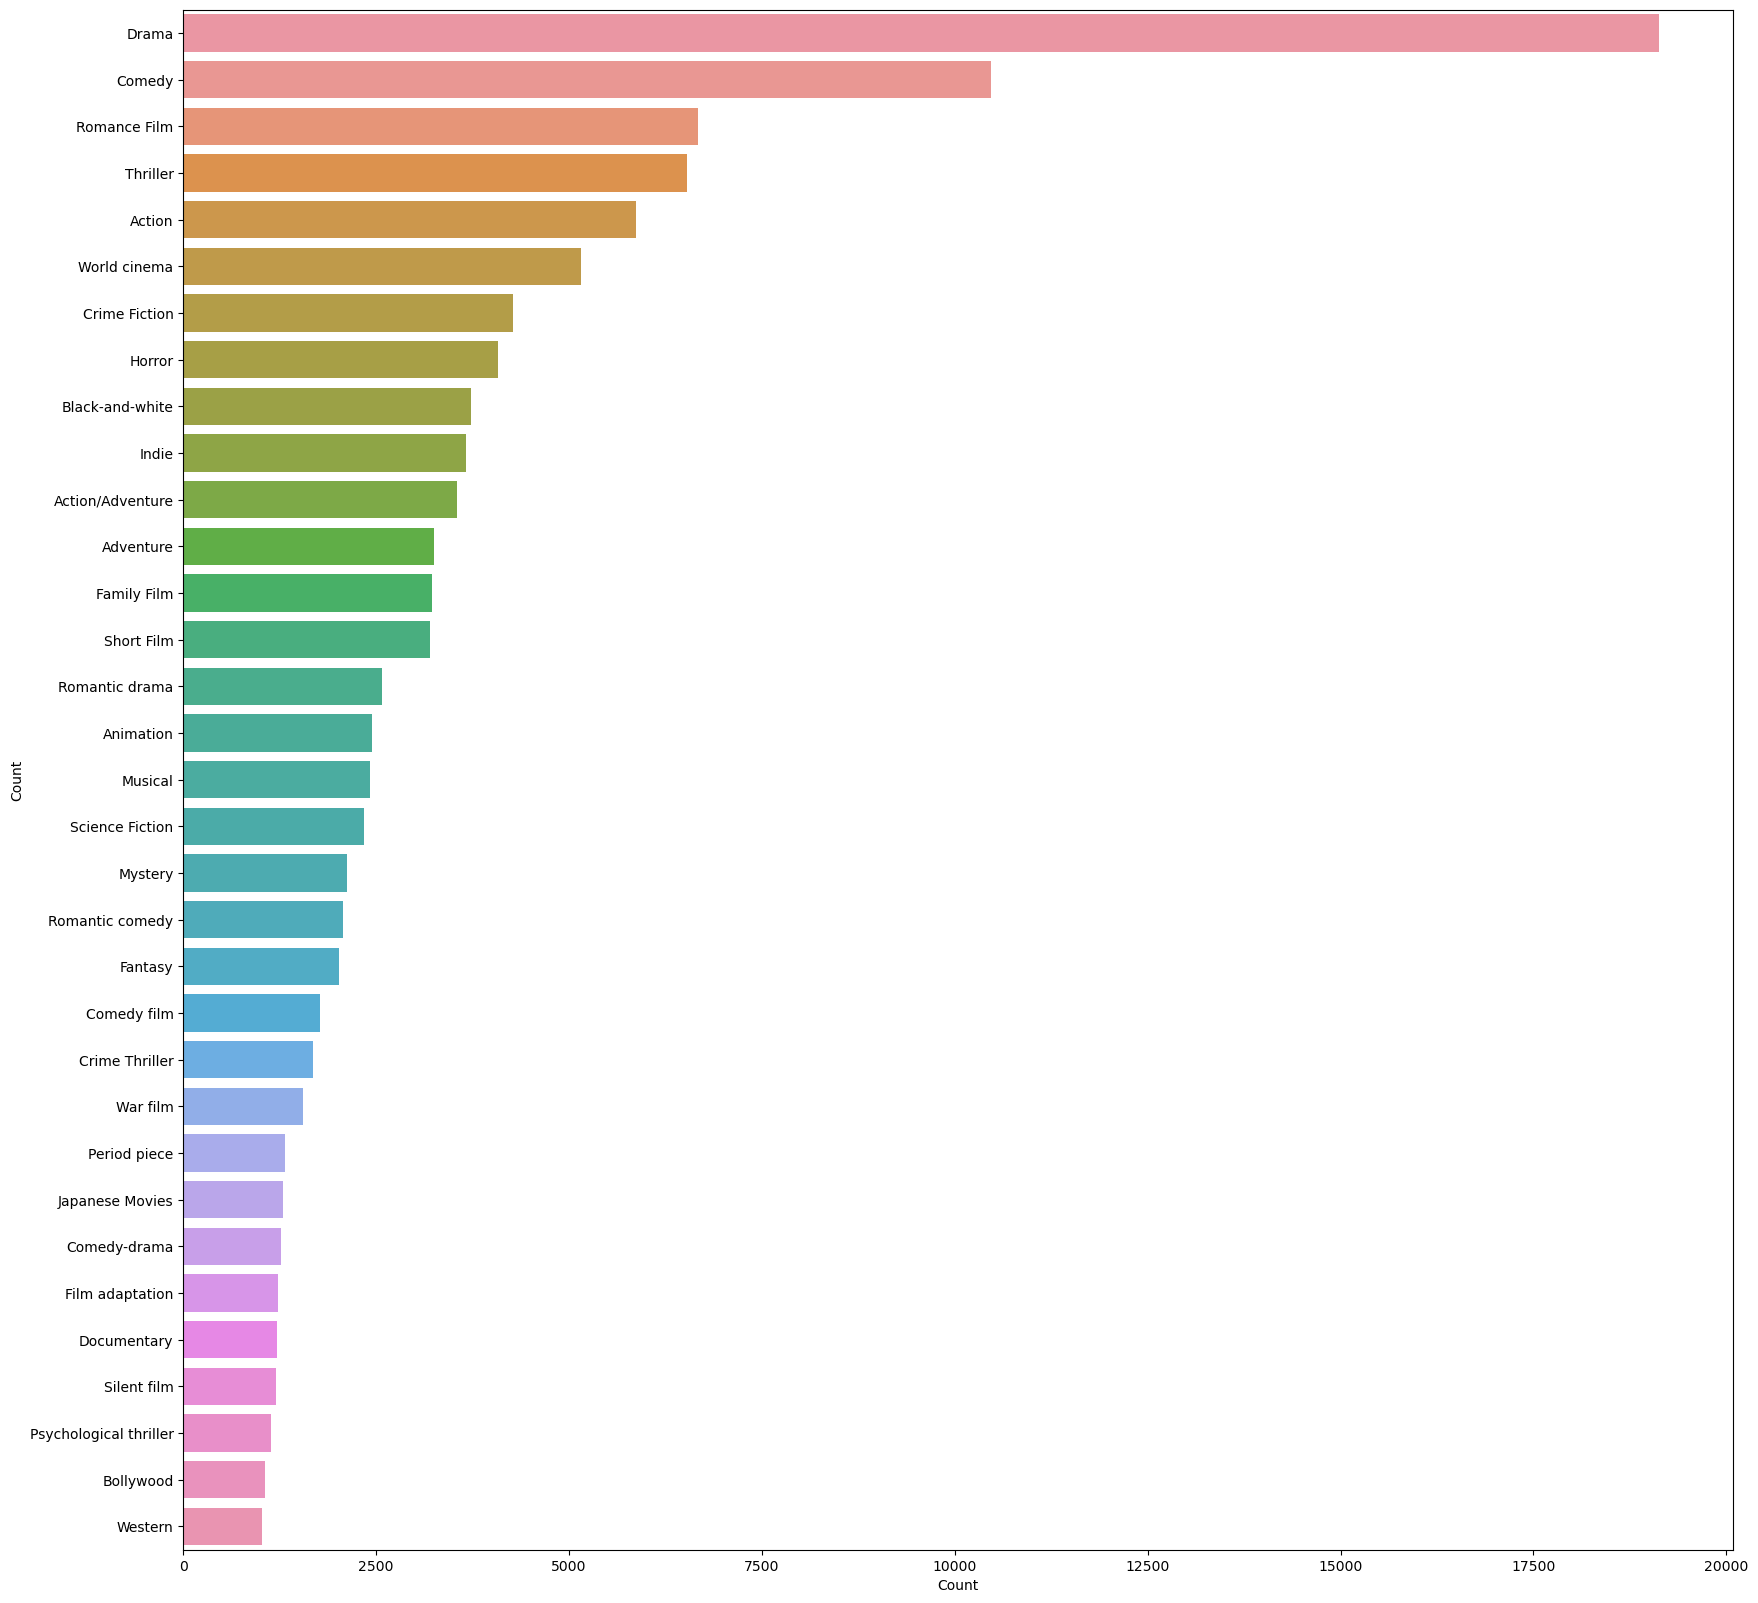

In [32]:
g = genres_list.nlargest(columns="Count", n=33)
plt.figure(figsize=(20,20))
ax = sns.barplot (data=g, x= "Count", y = "Genre")
ax.set(ylabel = 'Count')
plt.show()

In [33]:
def filter_synopsis(synopsis):
    synopsis = re.sub("\'","", synopsis)
    synopsis = re.sub("[^a-zA-Z]"," ", synopsis)
    synopsis = " ".join(synopsis.split())
    synopsis = synopsis.lower ()
    return synopsis

In [34]:
data['filtered_synopsis'] = data['Synopsis'].apply(lambda x:filter_synopsis(x))
data

C:\Users\rohan\AppData\Local\Temp\ipykernel_18304\2424284971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['filtered_synopsis'] = data['Synopsis'].apply(lambda x:filter_synopsis(x))


,Movie_id,Synopsis,Movie_name,Genre,Genre_new,filtered_synopsis
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]",shlykov a hard working taxi driver and lyosha ...
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr...",the nation of panem consists of a wealthy capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]",poovalli induchoodan is sentenced for six year...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...",[Comedy],the lemon drop kid a new york city swindler is...
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, World cinema]",seventh day adventist church pastor michael ch...
...,...,...,...,...,...,...
42198,2867597,"An attempt to bring the famed ""Mr. Bill"" clay ...",Mr. Bill's Real Life Adventures,"{""/m/01z4y"": ""Comedy"", ""/m/09q17"": ""Slapstick""}",[Comedy],an attempt to bring the famed mr bill clay cha...
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...","[Period piece, Drama, War film]",in hollywood director leo andreyev looks throu...
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...","[Short Film, Documentary]",american luthier focuses on randy parsons tran...
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama],abdur rehman khan a middle aged dry fruit sell...


In [35]:
eng_stopwords = set(stopwords.words("english"))
def stopwords_filtering(plot):
    filtered_text= [x for x in plot.split() if not x in eng_stopwords]
    return " ".join(filtered_text)

In [36]:
data['filtered_synopsis'] = data['filtered_synopsis'].apply(lambda x: stopwords_filtering(x))
data

C:\Users\rohan\AppData\Local\Temp\ipykernel_18304\3871418293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['filtered_synopsis'] = data['filtered_synopsis'].apply(lambda x: stopwords_filtering(x))


,Movie_id,Synopsis,Movie_name,Genre,Genre_new,filtered_synopsis
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]",shlykov hard working taxi driver lyosha saxoph...
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr...",nation panem consists wealthy capitol twelve p...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]",poovalli induchoodan sentenced six years priso...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...",[Comedy],lemon drop kid new york city swindler illegall...
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, World cinema]",seventh day adventist church pastor michael ch...
...,...,...,...,...,...,...
42198,2867597,"An attempt to bring the famed ""Mr. Bill"" clay ...",Mr. Bill's Real Life Adventures,"{""/m/01z4y"": ""Comedy"", ""/m/09q17"": ""Slapstick""}",[Comedy],attempt bring famed mr bill clay characters li...
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...","[Period piece, Drama, War film]",hollywood director leo andreyev looks photogra...
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...","[Short Film, Documentary]",american luthier focuses randy parsons transfo...
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama],abdur rehman khan middle aged dry fruit seller...


In [37]:
def lemmatization_plot(plot):
    lemmatizer = WordNetLemmatizer()
    filtered_text = [lemmatizer.lemmatize (x) for x in plot.split()]
    return " ".join(filtered_text)

In [38]:
data["filtered_synopsis"] = data["filtered_synopsis"].apply(lambda x: lemmatization_plot(x))
data

C:\Users\rohan\AppData\Local\Temp\ipykernel_18304\2576995121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["filtered_synopsis"] = data["filtered_synopsis"].apply(lambda x: lemmatization_plot(x))


,Movie_id,Synopsis,Movie_name,Genre,Genre_new,filtered_synopsis
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]",shlykov hard working taxi driver lyosha saxoph...
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr...",nation panem consists wealthy capitol twelve p...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]",poovalli induchoodan sentenced six year prison...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...",[Comedy],lemon drop kid new york city swindler illegall...
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, World cinema]",seventh day adventist church pastor michael ch...
...,...,...,...,...,...,...
42198,2867597,"An attempt to bring the famed ""Mr. Bill"" clay ...",Mr. Bill's Real Life Adventures,"{""/m/01z4y"": ""Comedy"", ""/m/09q17"": ""Slapstick""}",[Comedy],attempt bring famed mr bill clay character lif...
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...","[Period piece, Drama, War film]",hollywood director leo andreyev look photograp...
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...","[Short Film, Documentary]",american luthier focus randy parson transforma...
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama],abdur rehman khan middle aged dry fruit seller...


In [39]:
data.to_csv("projectDataset")

# Feature Engineering and Model Development

In [40]:
data = pd.read_csv("projectDataset")

In [41]:
data

,Unnamed: 0,Movie_id,Synopsis,Movie_name,Genre,Genre_new,filtered_synopsis
0,0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","['Drama', 'World cinema']",shlykov hard working taxi driver lyosha saxoph...
1,1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","['Action/Adventure', 'Science Fiction', 'Actio...",nation panem consists wealthy capitol twelve p...
2,2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","['Musical', 'Action', 'Drama', 'Bollywood']",poovalli induchoodan sentenced six year prison...
3,3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...",['Comedy'],lemon drop kid new york city swindler illegall...
4,4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","['Crime Fiction', 'Drama', 'World cinema']",seventh day adventist church pastor michael ch...
...,...,...,...,...,...,...,...
40098,42198,2867597,"An attempt to bring the famed ""Mr. Bill"" clay ...",Mr. Bill's Real Life Adventures,"{""/m/01z4y"": ""Comedy"", ""/m/09q17"": ""Slapstick""}",['Comedy'],attempt bring famed mr bill clay character lif...
40099,42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...","['Period piece', 'Drama', 'War film']",hollywood director leo andreyev look photograp...
40100,42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...","['Short Film', 'Documentary']",american luthier focus randy parson transforma...
40101,42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",['Drama'],abdur rehman khan middle aged dry fruit seller...


In [42]:
# Converting string to list
data['Genre_new'] = data['Genre_new'].apply(lambda x: literal_eval(x))


## Quantifying the Labels

In [43]:
multilabel_binarizer1 = MultiLabelBinarizer()
multilabel_binarizer1.fit (data['Genre_new'])
y1 = multilabel_binarizer1.transform(data['Genre_new'])
y1
multilabel_binarizer1.classes_

array(['Action', 'Action/Adventure', 'Adventure', 'Animation',
       'Bollywood', 'Comedy', 'Crime Fiction', 'Crime Thriller',
       'Documentary', 'Drama', 'Family Film', 'Fantasy', 'Horror',
       'Japanese Movies', 'Musical', 'Mystery', 'Period piece',
       'Psychological thriller', 'Romance Film', 'Romantic comedy',
       'Romantic drama', 'Science Fiction', 'Short Film', 'Thriller',
       'War film', 'Western', 'World cinema'], dtype=object)

## Vectorization

In [44]:
tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(data["filtered_synopsis"])
print(x_tfidf.shape,y1.shape)

(40103, 136667) (40103, 27)


In [45]:
bow_vectorizer = CountVectorizer()
x_bow = bow_vectorizer.fit_transform(data["filtered_synopsis"])
print(x_bow.shape,y1.shape)

(40103, 136667) (40103, 27)


# TF - IDF Models with full dataset

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y1,test_size=0.2,random_state=42)

## Logistic Regression

In [47]:
lr_tfidf = LogisticRegression()
clf_tfidf =OneVsRestClassifier(lr_tfidf)
clf_tfidf.fit(x_train,y_train)
tfidf_pred = clf_tfidf.predict(x_test)
print(classification_report(y_test, tfidf_pred,target_names= multilabel_binarizer1.classes_))

                        precision    recall  f1-score   support

                Action       0.75      0.21      0.33      1201
      Action/Adventure       0.59      0.08      0.14       731
             Adventure       0.77      0.08      0.15       676
             Animation       0.77      0.23      0.36       532
             Bollywood       0.78      0.03      0.06       209
                Comedy       0.74      0.31      0.43      2063
         Crime Fiction       0.62      0.14      0.22       850
        Crime Thriller       0.47      0.03      0.05       316
           Documentary       0.95      0.14      0.24       256
                 Drama       0.72      0.71      0.72      3827
           Family Film       0.71      0.16      0.26       634
               Fantasy       0.77      0.05      0.09       425
                Horror       0.92      0.36      0.52       796
       Japanese Movies       0.96      0.08      0.15       273
               Musical       0.54      

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [48]:
dt_tfidf = DecisionTreeClassifier(max_depth=8)
clf_tfidf =OneVsRestClassifier(dt_tfidf)
clf_tfidf.fit(x_train,y_train)
tfidf_pred = clf_tfidf.predict(x_test)
print(classification_report(y_test, tfidf_pred,target_names= multilabel_binarizer1.classes_))

                        precision    recall  f1-score   support

                Action       0.59      0.15      0.23      1201
      Action/Adventure       0.38      0.08      0.13       731
             Adventure       0.55      0.12      0.20       676
             Animation       0.71      0.25      0.37       532
             Bollywood       0.38      0.08      0.13       209
                Comedy       0.57      0.10      0.17      2063
         Crime Fiction       0.50      0.12      0.19       850
        Crime Thriller       0.32      0.06      0.10       316
           Documentary       0.67      0.33      0.44       256
                 Drama       0.61      0.55      0.58      3827
           Family Film       0.54      0.12      0.19       634
               Fantasy       0.51      0.11      0.18       425
                Horror       0.69      0.29      0.41       796
       Japanese Movies       0.69      0.30      0.42       273
               Musical       0.30      

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Bow Models With Full Dataset

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x_bow,y1,test_size=0.2,random_state=42)

## Logistic Regression

In [52]:
lr_bow = LogisticRegression()
clf_bow =OneVsRestClassifier(lr_bow)
clf_bow.fit(x_train,y_train)
bow_pred = clf_bow.predict(x_test)
print(classification_report(y_test, bow_pred,target_names= multilabel_binarizer1.classes_))

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

                        precision    recall  f1-score   support

                Action       0.53      0.43      0.47      1201
      Action/Adventure       0.48      0.35      0.41       731
             Adventure       0.52      0.37      0.43       676
             Animation       0.66      0.46      0.54       532
             Bollywood       0.35      0.22      0.27       209
                Comedy       0.56      0.48      0.52      2063
         Crime Fiction       0.46      0.36      0.40       850
        Crime Thriller       0.32      0.23      0.27       316
           Documentary       0.75      0.44      0.55       256
                 Drama       0.68      0.67      0.68      3827
           Family Film       0.52      0.39      0.45       634
               Fantasy       0.49      0.30      0.37       425
                Horror       0.77      0.62      0.68       796
       Japanese Movies       0.64      0.37      0.47       273
               Musical       0.34      

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [53]:
dt_bow = DecisionTreeClassifier(max_depth=8)
clf_bow =OneVsRestClassifier(dt_bow)
clf_bow.fit(x_train,y_train)
bow_pred = clf_bow.predict(x_test)
print(classification_report(y_test, bow_pred,target_names= multilabel_binarizer1.classes_))

                        precision    recall  f1-score   support

                Action       0.54      0.14      0.23      1201
      Action/Adventure       0.50      0.08      0.14       731
             Adventure       0.60      0.13      0.21       676
             Animation       0.69      0.25      0.36       532
             Bollywood       0.41      0.06      0.10       209
                Comedy       0.59      0.10      0.17      2063
         Crime Fiction       0.50      0.12      0.19       850
        Crime Thriller       0.24      0.05      0.08       316
           Documentary       0.61      0.35      0.44       256
                 Drama       0.59      0.69      0.64      3827
           Family Film       0.63      0.16      0.25       634
               Fantasy       0.37      0.08      0.13       425
                Horror       0.69      0.29      0.41       796
       Japanese Movies       0.73      0.28      0.40       273
               Musical       0.41      

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Optimization

In [54]:
svd = TruncatedSVD(n_components=350,n_iter=7,random_state=42)
svd.fit(x_bow)
svd1_vec =svd.transform(x_bow)

In [55]:
x_train,x_test,y_train,y_test = train_test_split(svd1_vec,y1,test_size=0.2,random_state=42)
lr_bowsvd = LogisticRegression()
clf_bowsvd =OneVsRestClassifier(lr_bowsvd)
clf_bowsvd.fit(x_train,y_train)
bow_presvd = clf_bowsvd.predict(x_test)
print(classification_report(y_test,bow_presvd,target_names=multilabel_binarizer1.classes_))

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

                        precision    recall  f1-score   support

                Action       0.65      0.25      0.36      1201
      Action/Adventure       0.56      0.20      0.29       731
             Adventure       0.61      0.23      0.34       676
             Animation       0.56      0.27      0.37       532
             Bollywood       0.42      0.16      0.23       209
                Comedy       0.65      0.23      0.34      2063
         Crime Fiction       0.62      0.22      0.32       850
        Crime Thriller       0.38      0.11      0.17       316
           Documentary       0.60      0.23      0.33       256
                 Drama       0.70      0.62      0.66      3827
           Family Film       0.66      0.26      0.37       634
               Fantasy       0.56      0.20      0.29       425
                Horror       0.76      0.41      0.53       796
       Japanese Movies       0.51      0.11      0.18       273
               Musical       0.47      

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
x_train,x_test,y_train,y_test = train_test_split(svd1_vec,y1,test_size=0.2,random_state=42)
dt_bowsvd = DecisionTreeClassifier(max_depth=8)
clf_bowsvd = OneVsRestClassifier(dt_bowsvd)
clf_bowsvd.fit(x_train,y_train)
bow_presvd = clf_bowsvd.predict(x_test)
print(classification_report(y_test,bow_presvd,target_names=multilabel_binarizer1.classes_))

                        precision    recall  f1-score   support

                Action       0.47      0.23      0.31      1201
      Action/Adventure       0.37      0.15      0.21       731
             Adventure       0.45      0.18      0.26       676
             Animation       0.40      0.23      0.29       532
             Bollywood       0.21      0.07      0.11       209
                Comedy       0.43      0.19      0.27      2063
         Crime Fiction       0.45      0.17      0.25       850
        Crime Thriller       0.17      0.07      0.10       316
           Documentary       0.25      0.09      0.13       256
                 Drama       0.59      0.68      0.63      3827
           Family Film       0.42      0.15      0.22       634
               Fantasy       0.30      0.09      0.14       425
                Horror       0.55      0.26      0.35       796
       Japanese Movies       0.23      0.03      0.06       273
               Musical       0.17      

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Sampling

In [57]:
data1 = data.sample(frac=0.1)
data1

,Unnamed: 0,Movie_id,Synopsis,Movie_name,Genre,Genre_new,filtered_synopsis
33188,34971,4602108,Teams from all across Germany descend on a qui...,Summer Storm,"{""/m/0hn10"": ""LGBT"", ""/m/03q4nz"": ""World cinem...","[World cinema, Drama, Comedy]",team across germany descend quiet camping grou...
6410,6756,20122721,The film chronicles three desperate days in a ...,On the Bowery,"{""/m/0hj3n7s"": ""Illnesses & Disabilities"", ""/m...",[Documentary],film chronicle three desperate day impoverishe...
5627,5919,22805715,"Nate , a small-time jazz musician and recoveri...",Passion Play,"{""/m/01jfsb"": ""Thriller"", ""/m/0219x_"": ""Indie""...","[Thriller, Fantasy, Drama, Romantic drama, Rom...",nate small time jazz musician recovering heroi...
14862,15673,27639550,"Having cleaned up Tombstone, marshal Frame Joh...",Law and Order,"{""/m/0hfjk"": ""Western"", ""/m/02kdv5l"": ""Action""}","[Western, Action]",cleaned tombstone marshal frame johnson quits ...
10968,11576,18482025,Nagavalli is a supernatural thriller; its stor...,Nagavalli,"{""/m/01jfsb"": ""Thriller"", ""/m/02kdv5l"": ""Actio...","[Thriller, Action, Fantasy]",nagavalli supernatural thriller story revolves...
...,...,...,...,...,...,...,...
8839,9310,12015098,"Carson portrays Dexter Jackson, a young, black...",Livin' Large,"{""/m/0hj3nby"": ""Media Satire"", ""/m/07s9rl0"": ""...","[Drama, Comedy]",carson portrays dexter jackson young black del...
27375,28843,5525737,"Clark , a young Mathematics major at Universit...",Shrieker,"{""/m/03npn"": ""Horror"", ""/m/0hj3m_q"": ""Creature...",[Horror],clark young mathematics major university think...
11555,12196,26800344,Retired CIA Agent Thomas Sparrow retires and ...,Crimes of the Past,"{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama...","[Thriller, Drama]",retired cia agent thomas sparrow retires retur...
11492,12131,6340115,"Two sisters, 11-year-old Amanda and 16-year-o...",Manny & Lo,"{""/m/04228s"": ""Road movie"", ""/m/01t_vv"": ""Come...","[Comedy, Drama]",two sister year old amanda year old laurel run...


In [58]:
multilabel_binerizer1 = MultiLabelBinarizer()
multilabel_binarizer1.fit(data1["Genre_new"])
y1= multilabel_binarizer1.transform(data1["Genre_new"])
y1

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

## TF - IDF

In [59]:
tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(data1["filtered_synopsis"])
print(x_tfidf.shape,y1.shape)

(4010, 40465) (4010, 27)


In [60]:
x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y1,test_size=0.2,random_state=42)


In [61]:
lr_tfidf = LogisticRegression()
clf_tfidf =OneVsRestClassifier(lr_tfidf)
clf_tfidf.fit(x_train,y_train)
tfidf_pred = clf_tfidf.predict(x_test)
print(classification_report(y_test, tfidf_pred,target_names= multilabel_binarizer1.classes_))

                        precision    recall  f1-score   support

                Action       0.00      0.00      0.00       117
      Action/Adventure       0.00      0.00      0.00        77
             Adventure       0.00      0.00      0.00        75
             Animation       0.00      0.00      0.00        39
             Bollywood       0.00      0.00      0.00        22
                Comedy       0.78      0.03      0.07       201
         Crime Fiction       0.00      0.00      0.00        80
        Crime Thriller       0.00      0.00      0.00        32
           Documentary       0.00      0.00      0.00        25
                 Drama       0.70      0.54      0.61       400
           Family Film       0.00      0.00      0.00        56
               Fantasy       0.00      0.00      0.00        40
                Horror       0.00      0.00      0.00        77
       Japanese Movies       0.00      0.00      0.00        26
               Musical       0.00      

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
dt_tfidf = DecisionTreeClassifier(max_depth=8)
clf_tfidf =OneVsRestClassifier(dt_tfidf)
clf_tfidf.fit(x_train,y_train)
tfidf_pred = clf_tfidf.predict(x_test)
print(classification_report(y_test, tfidf_pred,target_names= multilabel_binarizer1.classes_))

                        precision    recall  f1-score   support

                Action       0.39      0.17      0.24       117
      Action/Adventure       0.32      0.08      0.12        77
             Adventure       0.26      0.07      0.11        75
             Animation       0.41      0.18      0.25        39
             Bollywood       0.29      0.09      0.14        22
                Comedy       0.37      0.11      0.17       201
         Crime Fiction       0.38      0.23      0.28        80
        Crime Thriller       0.38      0.16      0.22        32
           Documentary       0.67      0.40      0.50        25
                 Drama       0.60      0.52      0.55       400
           Family Film       0.30      0.05      0.09        56
               Fantasy       0.45      0.12      0.20        40
                Horror       0.53      0.23      0.32        77
       Japanese Movies       0.75      0.35      0.47        26
               Musical       0.21      

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Bow

In [63]:
bow_vectorizer = CountVectorizer()
x_bow = bow_vectorizer.fit_transform(data1["filtered_synopsis"])
print(x_bow.shape,y1.shape)

(4010, 40465) (4010, 27)


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_bow,y1,test_size=0.2,random_state=42)

In [65]:
lr_bow = LogisticRegression()
clf_bow =OneVsRestClassifier(lr_bow)
clf_bow.fit(x_train,y_train)
bow_pred = clf_bow.predict(x_test)
print(classification_report(y_test, bow_pred,target_names= multilabel_binarizer1.classes_))

                        precision    recall  f1-score   support

                Action       0.65      0.33      0.44       117
      Action/Adventure       0.50      0.23      0.32        77
             Adventure       0.47      0.21      0.29        75
             Animation       0.50      0.13      0.20        39
             Bollywood       0.40      0.09      0.15        22
                Comedy       0.48      0.33      0.39       201
         Crime Fiction       0.50      0.25      0.33        80
        Crime Thriller       0.30      0.09      0.14        32
           Documentary       0.67      0.16      0.26        25
                 Drama       0.65      0.59      0.62       400
           Family Film       0.48      0.20      0.28        56
               Fantasy       0.58      0.17      0.27        40
                Horror       0.72      0.47      0.57        77
       Japanese Movies       0.50      0.08      0.13        26
               Musical       0.30      

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
dt_bow = DecisionTreeClassifier(max_depth=8)
clf_bow =OneVsRestClassifier(dt_bow)
clf_bow.fit(x_train,y_train)
bow_pred = clf_bow.predict(x_test)
print(classification_report(y_test, bow_pred,target_names= multilabel_binarizer1.classes_))

                        precision    recall  f1-score   support

                Action       0.45      0.15      0.23       117
      Action/Adventure       0.42      0.10      0.17        77
             Adventure       0.35      0.09      0.15        75
             Animation       0.38      0.15      0.22        39
             Bollywood       0.22      0.09      0.13        22
                Comedy       0.32      0.10      0.15       201
         Crime Fiction       0.38      0.15      0.21        80
        Crime Thriller       0.31      0.12      0.18        32
           Documentary       0.57      0.32      0.41        25
                 Drama       0.60      0.54      0.57       400
           Family Film       0.33      0.09      0.14        56
               Fantasy       0.27      0.07      0.12        40
                Horror       0.61      0.25      0.35        77
       Japanese Movies       0.79      0.42      0.55        26
               Musical       0.29      

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
data = pd.read_csv("projectDataset")


In [68]:
data['Genre_new'] = data['Genre_new'].apply(lambda x: literal_eval(x))

In [69]:
multilabel_binarizer1 = MultiLabelBinarizer()
multilabel_binarizer1.fit (data['Genre_new'])
y1 = multilabel_binarizer1.transform(data['Genre_new'])
y1
multilabel_binarizer1.classes_

array(['Action', 'Action/Adventure', 'Adventure', 'Animation',
       'Bollywood', 'Comedy', 'Crime Fiction', 'Crime Thriller',
       'Documentary', 'Drama', 'Family Film', 'Fantasy', 'Horror',
       'Japanese Movies', 'Musical', 'Mystery', 'Period piece',
       'Psychological thriller', 'Romance Film', 'Romantic comedy',
       'Romantic drama', 'Science Fiction', 'Short Film', 'Thriller',
       'War film', 'Western', 'World cinema'], dtype=object)

In [113]:
multilabel_binarizer1 = MultiLabelBinarizer()
multilabel_binarizer1.fit (data['Genre_new'])

MultiLabelBinarizer()

In [105]:
import joblib

In [123]:
joblib.dump(multilabel_binarizer1, 'multilabel_binarizer1.pkl')


['multilabel_binarizer1.pkl']

In [107]:
multilabel_binarizer1

MultiLabelBinarizer()

In [71]:
tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(data["filtered_synopsis"])
print(x_tfidf.shape,y1.shape)

(40103, 136667) (40103, 27)


In [111]:
import joblib

In [112]:
joblib.dump(clf_tfidf, 'clf_tfidf.pkl')

joblib.dump(clf_bow, 'clf_bow.pkl')

joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

joblib.dump(bow_vectorizer, 'bow_vectorizer.pkl')


['bow_vectorizer.pkl']

# Model Showcase

In [72]:
bow_vectorizer = CountVectorizer()
x_bow = bow_vectorizer.fit_transform(data["filtered_synopsis"])
print(x_bow.shape,y1.shape)

(40103, 136667) (40103, 27)


In [73]:
lr_tfidf = LogisticRegression()
clf_tfidf =OneVsRestClassifier(lr_tfidf)
clf_tfidf.fit(x_tfidf,y1)

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


OneVsRestClassifier(estimator=LogisticRegression())

In [74]:
lr_bow = LogisticRegression()
clf_bow =OneVsRestClassifier(lr_bow)
clf_bow.fit(x_bow,y1)

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

OneVsRestClassifier(estimator=LogisticRegression())

In [75]:
svd_tf = TruncatedSVD(n_components=350,n_iter=7,random_state=42)
svd_tf.fit(x_tfidf)
svd1_vec =svd_tf.transform(x_tfidf)

In [76]:
lr_tfidfsvd = LogisticRegression()
clf_tfidfsvd =OneVsRestClassifier(lr_tfidfsvd)
clf_tfidfsvd.fit(svd1_vec,y1)

OneVsRestClassifier(estimator=LogisticRegression())

In [139]:
text1 = "a normal man who isnt blind but acting as blind to get sympathy from people accidently sees someone murderring and then the problems starts occuring in his life in the middle even he looses his lover but the end is unbelivable you have to watch it to get the end"

In [140]:
text1=filter_synopsis(text1)
text1=stopwords_filtering(text1)
text1=lemmatization_plot(text1)

In [141]:
text1 # Interstellar Movie

'normal man isnt blind acting blind get sympathy people accidently see someone murderring problem start occuring life middle even loos lover end unbelivable watch get end'

In [142]:
tfidf_text=tfidf_vectorizer.transform([text1])
bow_text = bow_vectorizer.transform([text1])

In [143]:
print(multilabel_binarizer1.inverse_transform(clf_tfidf.predict(tfidf_text))) # predictions

[()]


In [144]:
print(multilabel_binarizer1.inverse_transform(clf_bow.predict(bow_text))) # Predictions

[()]


In [145]:
text2 = "The implausible escape of a brilliant murderess brings U.S. Marshal Teddy Daniels (Leonardo DiCaprio) and his new partner (Mark Ruffalo) to Ashecliffe Hospital, a fortress-like insane asylum located on a remote, windswept island. The woman appears to have vanished from a locked room, and there are hints of terrible deeds committed within the hospital walls. As the investigation deepens, Teddy realizes he will have to confront his own dark fears if he hopes to make it off the island alive."
    

In [146]:
text2 = filter_synopsis(text2)
text2 = stopwords_filtering(text2)
text2 = lemmatization_plot(text2)

In [147]:
text2 # Shutter Island Movie

'implausible escape brilliant murderess brings u marshal teddy daniel leonardo dicaprio new partner mark ruffalo ashecliffe hospital fortress like insane asylum located remote windswept island woman appears vanished locked room hint terrible deed committed within hospital wall investigation deepens teddy realizes confront dark fear hope make island alive'

In [148]:
tfidf_text=tfidf_vectorizer.transform([text2])
bow_text = bow_vectorizer.transform([text2])

In [149]:
print(multilabel_binarizer1.inverse_transform(clf_tfidf.predict(tfidf_text))) # predictions

[('Horror', 'Thriller')]


In [150]:
print(multilabel_binarizer1.inverse_transform(clf_bow.predict(bow_text))) # Predictions

[('Horror', 'Thriller')]


In [151]:
text3 = "Epic romance, set in 16th-century India, about the love story between Jalaluddin Mohammad Akbar, the Mughal Emperor of Hindustan, and Rajput princess Jodhaa. In order to extend his empire, Akbar agrees to a marriage of alliance to young and fiery Jodhaa but soon realizes he has to defend his choice of bride as his courtiers voice their displeasure at the idea of their Muslim Emperor marrying a Hindu."

In [152]:
text3 = filter_synopsis(text3)
text3 = stopwords_filtering(text3)
text3 = lemmatization_plot(text3)

In [153]:
text3 # Jodha Akbar Movie

'epic romance set th century india love story jalaluddin mohammad akbar mughal emperor hindustan rajput princess jodhaa order extend empire akbar agrees marriage alliance young fiery jodhaa soon realizes defend choice bride courtier voice displeasure idea muslim emperor marrying hindu'

In [154]:
tfidf_text=tfidf_vectorizer.transform([text3])
bow_text = bow_vectorizer.transform([text3])

In [155]:
print(multilabel_binarizer1.inverse_transform(clf_tfidf.predict(tfidf_text))) # predictions

[('Drama', 'Romance Film')]


In [156]:
print(multilabel_binarizer1.inverse_transform(clf_bow.predict(bow_text))) # Predictions

[('Drama', 'Romance Film', 'Romantic drama', 'World cinema')]


In [108]:
import requests
from bs4 import BeautifulSoup
import re

def predicting(synopsis):
    filter_synopsis(synopsis)
    stopwords_filtering(synopsis)
    lemmatization_plot(synopsis)
    tfidf_text=tfidf_vectorizer.transform([synopsis])
    bow_text = bow_vectorizer.transform([synopsis])
    print("Genre is : ",multilabel_binarizer1.inverse_transform(clf_bow.predict(bow_text)))
    print("Genre is :",multilabel_binarizer1.inverse_transform(clf_tfidf.predict(tfidf_text)))
    
def projectmain():
    
    movie_name = input("Enter the movie name: ")

    # Construct the Google search URL
    search_url = "https://www.google.com/search?q={}+synopsis".format(movie_name)

    # Send an HTTP GET request to Google
    response = requests.get(search_url)

    # Parse the HTML content of the search results
    soup = BeautifulSoup(response.text, 'html.parser')
    text=soup.get_text()
    match = re.search(r'Film synopsis(.{1,1000})', text)

    if match:
        synopsis = match.group(1).strip()
        predicting(synopsis)
    else:
        print("Synopsis not found in the provided text.")


In [131]:
projectmain()

Enter the movie name: inception
Genre is :  [('Comedy', 'Psychological thriller', 'Thriller')]
Genre is : [()]
